Попробуем предсказать стоимость машин и понять, от каких факторов зависит ценообразование на автомобили. Определим, какие переменные важны для прогнозирования и насколько хорошо полученная модель описывает данные. 

In [118]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sns.set(
    font_scale=1.2
)

## Загрузите данные, проверьте правильность, наличие пропущенных значений, типы данных.

In [119]:
cars = pd.read_csv('cars.csv')
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [120]:
cars.dtypes

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [121]:
cars.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Создайте новый признак – марку автомобиля (company). Машины каких производителей встречаются в датасете? Далее исправьте названия и проверьте изменения.

In [122]:
cars['company'] = cars.CarName.apply(lambda x: x.split(' ')[0])

In [123]:
cars.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [124]:
def rename(CarName):
    
    name_split = CarName.split(' ')
    
    if name_split[0] == 'maxda':
        name_split[0] = 'mazda'
    elif name_split[0] == 'Nissan':
        name_split[0] = 'nissan'
    elif name_split[0] == 'porcshce':
        name_split[0] = 'porsche'
    elif name_split[0] == 'toyouta':
        name_split[0] = 'toyota'
    elif name_split[0] == 'vokswagen':
        name_split[0] = 'volkswagen'
    elif name_split[0] == 'vw':
        name_split[0] = 'volkswagen'
    
    name_split = ' '.join(name_split)
    
    return name_split

In [125]:
cars['CarName'] = cars.CarName.apply(lambda x: rename(x))

In [126]:
cars['company'] = cars.CarName.apply(lambda x: x.split(' ')[0])

In [127]:
cars.company.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Оставьте только часть предикторов, после чего посчитайте корреляцию между price и другими переменными.

In [128]:
cars = cars \
    .drop(columns=['car_ID']) \
    .rename(columns={'CarName': 'car_name'})

In [129]:
cars = cars[['company', 'car_name', 'price', 'fueltype',
             'aspiration','carbody', 'drivewheel',
             'wheelbase', 'carlength','carwidth',
             'curbweight', 'enginetype', 'cylindernumber',
             'enginesize', 'boreratio','horsepower']]

In [130]:
cars.corr()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower
price,1.000000,0.577816,0.682920,0.759325,0.835305,0.874145,0.553173,0.808139
wheelbase,0.577816,1.000000,0.874587,0.795144,0.776386,0.569329,0.488750,0.353294
carlength,0.682920,0.874587,1.000000,0.841118,0.877728,0.683360,0.606454,0.552623
carwidth,0.759325,0.795144,0.841118,1.000000,0.867032,0.735433,0.559150,0.640732
curbweight,0.835305,0.776386,0.877728,0.867032,1.000000,0.850594,0.648480,0.750739
enginesize,0.874145,0.569329,0.683360,0.735433,0.850594,1.000000,0.583774,0.809769
boreratio,0.553173,0.488750,0.606454,0.559150,0.648480,0.583774,1.000000,0.573677
horsepower,0.808139,0.353294,0.552623,0.640732,0.750739,0.809769,0.573677,1.000000


## Преобразуйте категориальные переменные с помощью pd.get_dummies(). 

Линейная регрессия в python не справляется с категориальными переменными. Функция pd.get_dummies() создает фиктивные переменные на основе изначальных категорий, представленные в виде 0 и 1. Официально такое преобразование называется One-Hot Encoding. 

In [131]:
cars_dummy = pd.get_dummies(data=cars, drop_first = True)

In [132]:
cars_dummy.head()

,price,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,company_audi,company_bmw,...,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two
0,13495.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16500.0,88.6,168.8,64.1,2548,130,3.47,111,0,0,...,0,0,0,0,0,1,0,0,0,0
2,16500.0,94.5,171.2,65.5,2823,152,2.68,154,0,0,...,0,0,1,0,0,0,1,0,0,0
3,13950.0,99.8,176.6,66.2,2337,109,3.19,102,1,0,...,1,0,0,0,0,1,0,0,0,0
4,17450.0,99.4,176.6,66.4,2824,136,3.19,115,1,0,...,1,0,0,0,1,0,0,0,0,0


## Постройте модель с одним предиктором цены – horsepower. Какой процент изменчивости объясняет полученная модель? 

<AxesSubplot:xlabel='horsepower', ylabel='price'>

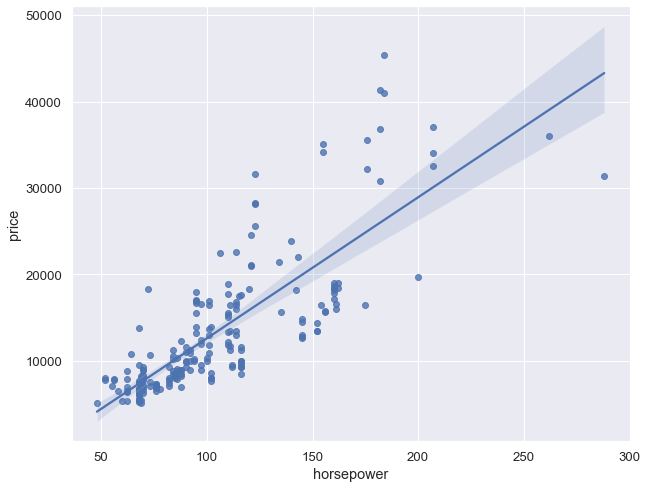

In [133]:
plt.figure(figsize=(10,8))
sns.regplot(data=cars, x='horsepower', y='price')

* Линейная регрессия через sklearn

In [134]:
model = LinearRegression()

In [135]:
X = pd.DataFrame(cars.horsepower)

In [136]:
Y = pd.DataFrame(cars.price)

In [137]:
model.fit(X, Y)

LinearRegression()

In [138]:
model.coef_

array([[163.26306097]])

In [139]:
model.intercept_

array([-3721.76149432])

In [140]:
model.score(X, Y)

0.653088356490231

In [141]:
X1 = pd.DataFrame(cars_dummy.horsepower)

In [142]:
Y1 = pd.DataFrame(cars_dummy.price)

In [143]:
model.fit(X1, Y1)

LinearRegression()

In [144]:
model.coef_

array([[163.26306097]])

In [145]:
model.intercept_

array([-3721.76149432])

In [146]:
model.score(X1, Y1)

0.653088356490231

## В линейную регрессию sklearn нужно посылать dummy датафрейм!!

* Линейная регрессия через statmodels

In [147]:
model_price_horsepower = smf.ols('price ~ horsepower', cars).fit()
model_price_horsepower.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.48e-48
Time:                        18:10:21   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.000   -5555.163   -1888.360
horsepower   163.2631      8.351     19.549      0.000     146.796     179.730
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [148]:
model_price_horsepower = smf.ols('price ~ horsepower', cars_dummy).fit()
model_price_horsepower.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.651
Method:                 Least Squares   F-statistic:                     382.2
Date:                Fri, 21 Oct 2022   Prob (F-statistic):           1.48e-48
Time:                        18:10:21   Log-Likelihood:                -2024.0
No. Observations:                 205   AIC:                             4052.
Df Residuals:                     203   BIC:                             4059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3721.7615    929.849     -4.003      0.000   -5555.163   -1888.360
horsepower   163.2631      8.351     19.549      0.000     146.796     179.730
==============================================================================
Omnibus:                       47.741   Durbin-Watson:                   0.792
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               91.702
Skew:                           1.141   Prob(JB):                     1.22e-20
Kurtosis:                       5.352   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## statmodels.smf.ols неважно какой датафрейм

# Доделать !!!

## Построим ещё две модели:

## 1) модель со всеми предикторами
## 2) модель со всеми предикторами, кроме марок машин

In [162]:
#model = smf.ols('price ~ horsepower, fueltype, aspiration, \
#                carbody, drivewheel, wheelbase, carlength, \
#                carwidth, curbweight, enginetype, cylindernumber, \
#                enginesize, boreratio', cars_dummy).fit()
#model_price_horsepower.summary()

In [163]:
#cars_dummy.columns.values

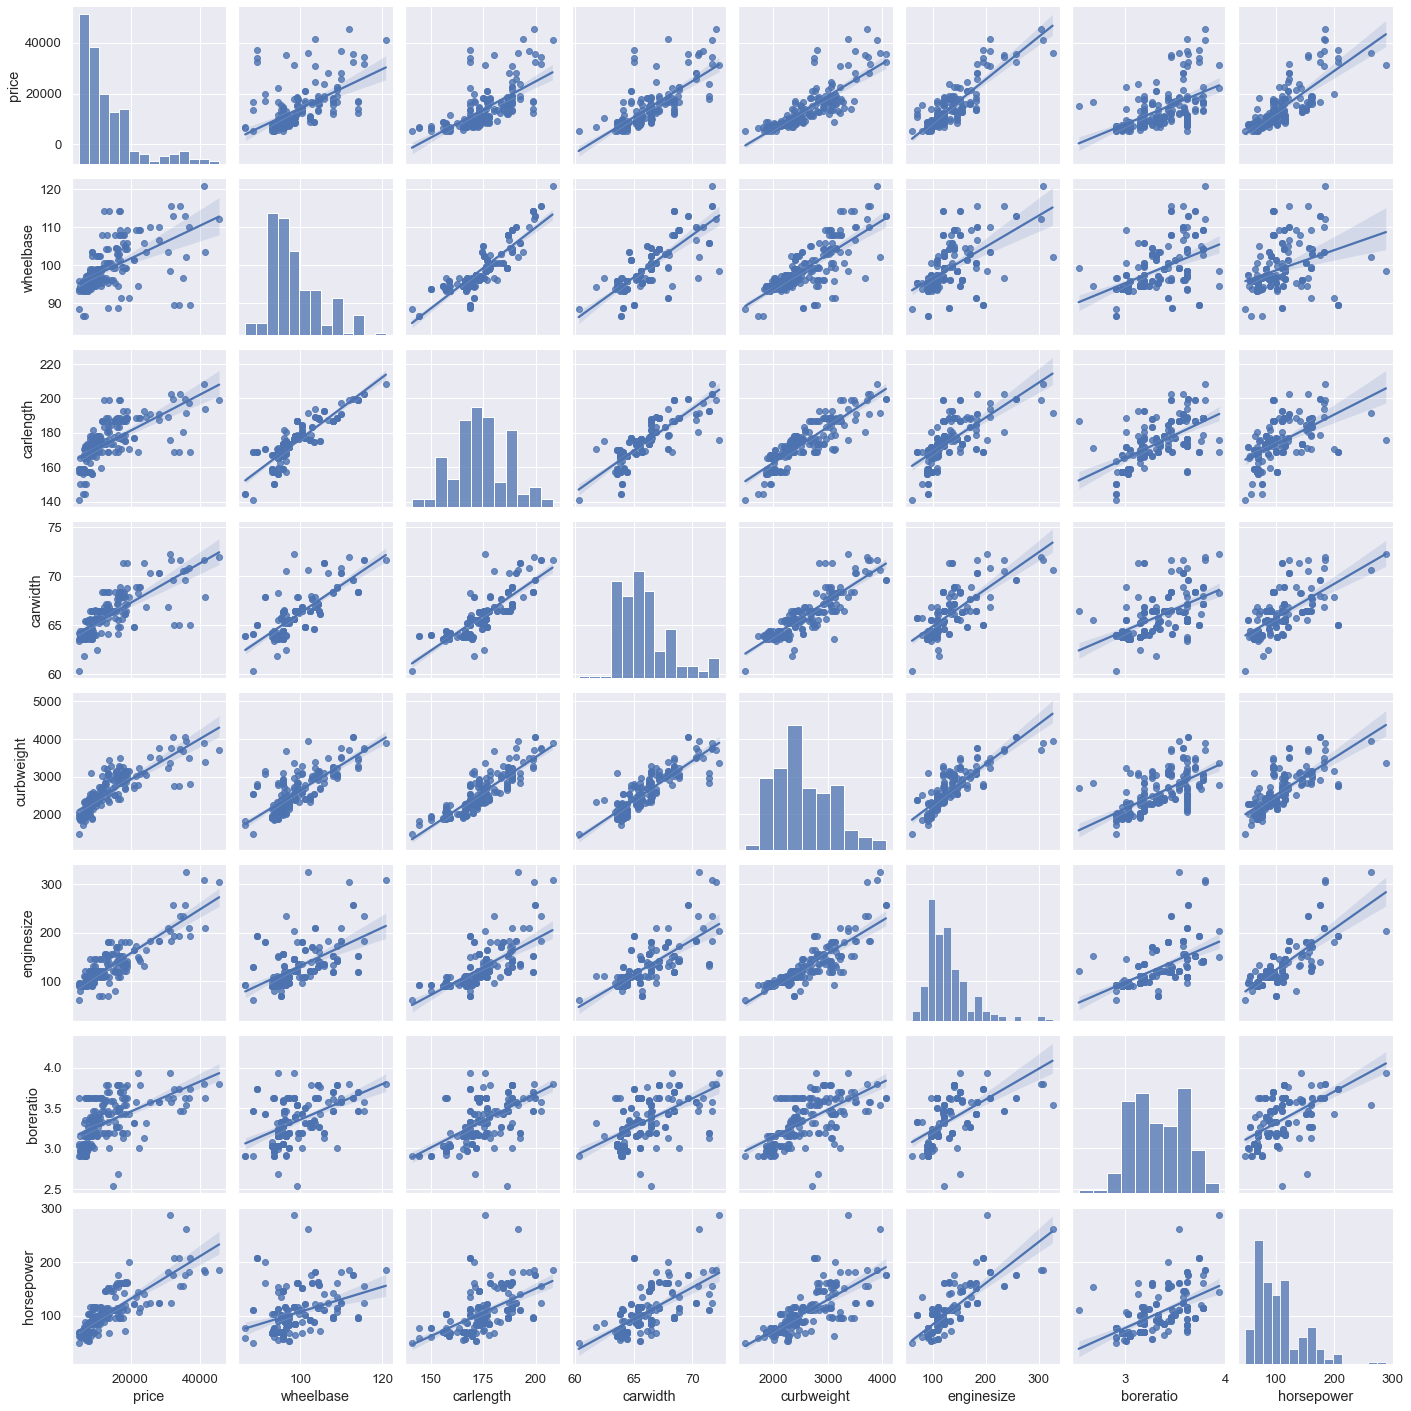

In [164]:
sns.pairplot(data=cars, kind='reg')